# MTN CUSTOMER CHURN ANALYSIS

 # Business Objective 
The goal of this project is to analyze customer behavior and identify key factors influencing customer churn for MTN. By leveraging data-driven insights, the objective is to predict which customers are at risk of leaving and develop targeted retention strategies to improve customer loyalty, reduce churn rates, and enhance overall customer satisfaction. This will help MTN optimize customer acquisition costs, increase revenue, and maintain a competitive edge in the telecommunications industry.

# Hypothesis Testing Overview:
Null Hypothesis (H₀):

- Satisfaction Rate and Reasons for Churn do not significantly affect customer churn.
Alternative Hypothesis (H₁):

- Satisfaction Rate and Reasons for Churn significantly affect customer churn.

# Dataset Overview
* This dataset contains 974 rows of customer entries 
* 17 Columns

# Import libraries and Data

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#load the data
mtn_data = pd.read_csv(r'C:\Users\Rebecca\Documents\Data Analytics projects\mtn_customer_churn.csv')
mtn_data.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


# Initial Exploration

In [97]:
#check for unique values in the data
mtn_data.nunique()

Customer ID                  496
Full Name                    484
Date of Purchase               3
Age                           65
State                         35
MTN Device                     4
Gender                         2
Satisfaction Rate              5
Customer Review                5
Customer Tenure in months     60
Subscription Plan             21
Unit Price                    20
Number of Times Purchased     20
Total Revenue                245
Data Usage                   954
Customer Churn Status          2
Reasons for Churn              7
dtype: int64

In [98]:
mtn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

In [99]:
#summary statistics of the data
mtn_data.describe()

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage
count,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02,974.000000
mean,48.043121,2.947639,31.422998,19196.663244,10.564682,2.046696e+05,99.304764
std,17.764307,1.384219,17.191256,25586.726985,5.709427,3.247855e+05,57.739511
min,16.000000,1.000000,1.000000,350.000000,1.000000,3.500000e+02,0.820000
25%,32.000000,2.000000,17.000000,5500.000000,5.000000,3.300000e+04,47.637500
50%,49.000000,3.000000,31.000000,14500.000000,11.000000,1.080000e+05,103.330000
75%,63.750000,4.000000,47.000000,24000.000000,15.000000,2.610000e+05,149.697500
max,80.000000,5.000000,60.000000,150000.000000,20.000000,3.000000e+06,200.000000


# Initial insight
* We have 974 customers in our data
* 


# Data Cleaning and Preprocessing

In [100]:
#check for missing values
mtn_data.isnull().sum()

Customer ID                    0
Full Name                      0
Date of Purchase               0
Age                            0
State                          0
MTN Device                     0
Gender                         0
Satisfaction Rate              0
Customer Review                0
Customer Tenure in months      0
Subscription Plan              0
Unit Price                     0
Number of Times Purchased      0
Total Revenue                  0
Data Usage                     0
Customer Churn Status          0
Reasons for Churn            690
dtype: int64

In [101]:
#fill in the missing values with the mean of the column
mtn_data['Reasons for Churn'].fillna(mtn_data['Reasons for Churn'].mode()[0], inplace=True)

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_1480\2191689214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mtn_data['Reasons for Churn'].fillna(mtn_data['Reasons for Churn'].mode()[0], inplace=True)


Insight : The are 600 missing entries in the reasons for churn column , we are going to fill the missing rows with mode of the column ,because it is a common denominator of our analysis.

In [102]:
#check for duplicated values
mtn_data.duplicated().sum()

0

# Data Exploration 

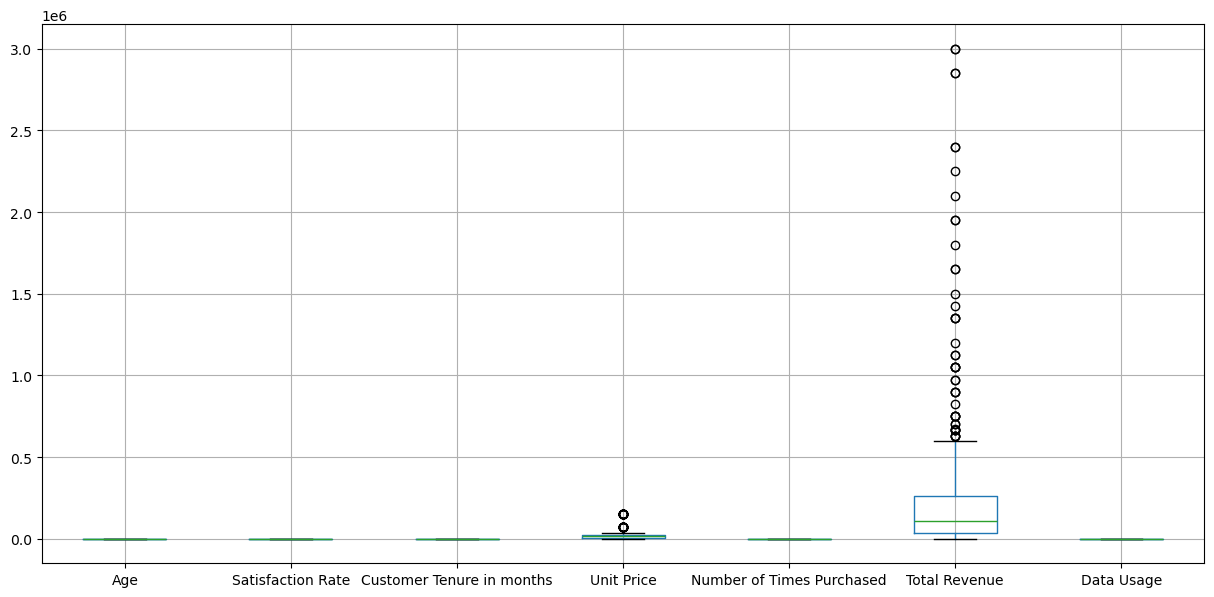

In [103]:
#check for outiers in the data
mtn_data.boxplot(figsize=(15,7))
plt.show()

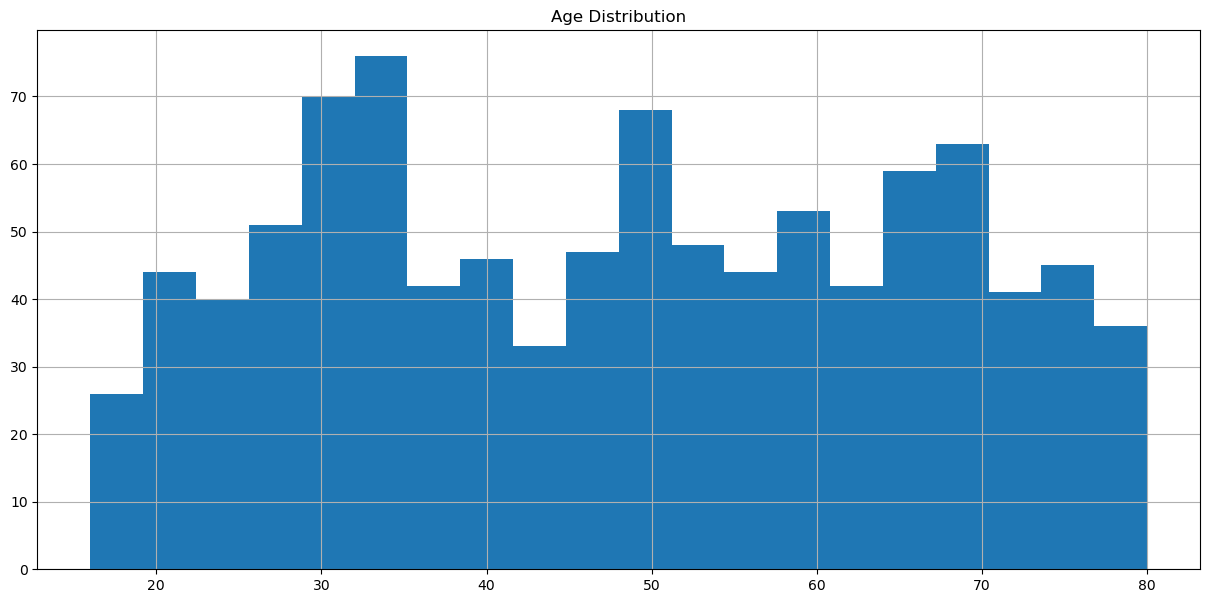

In [104]:
#histogram of the for Age
mtn_data['Age'].hist(figsize=(15,7), bins=20)
plt.title('Age Distribution')
plt.show()

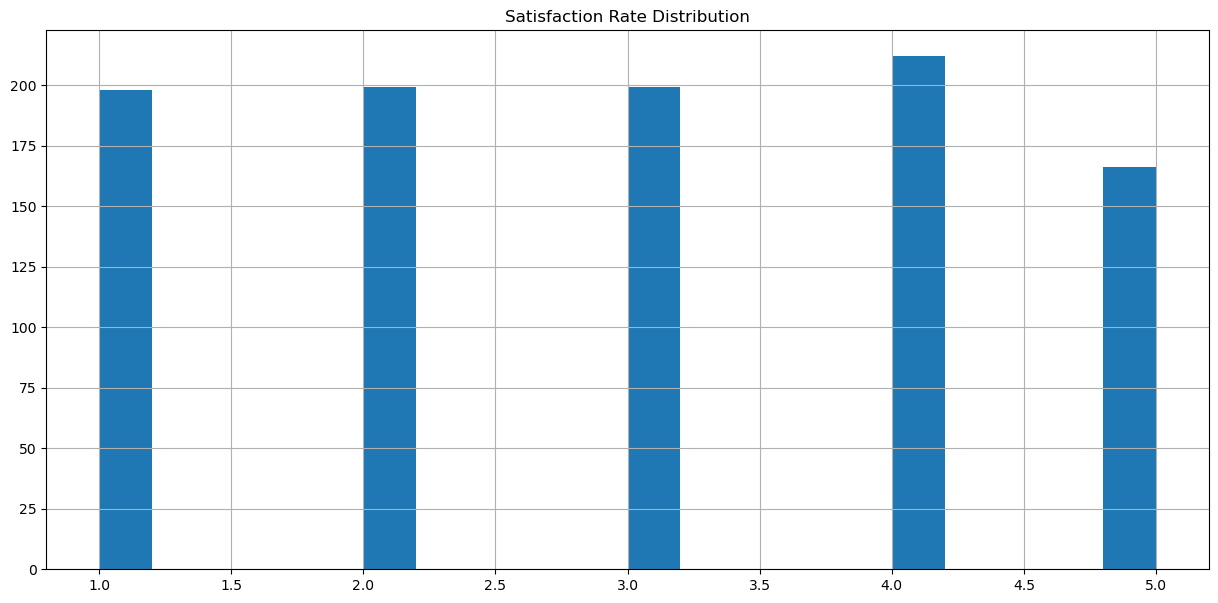

In [105]:
#histogram for Satisfaction Rate
mtn_data['Satisfaction Rate'].hist(figsize=(15,7), bins=20)
plt.title('Satisfaction Rate Distribution')
plt.show()

* Highest Satisfaction score is between 4 and 4.5, whch accounts to more than 200 customers

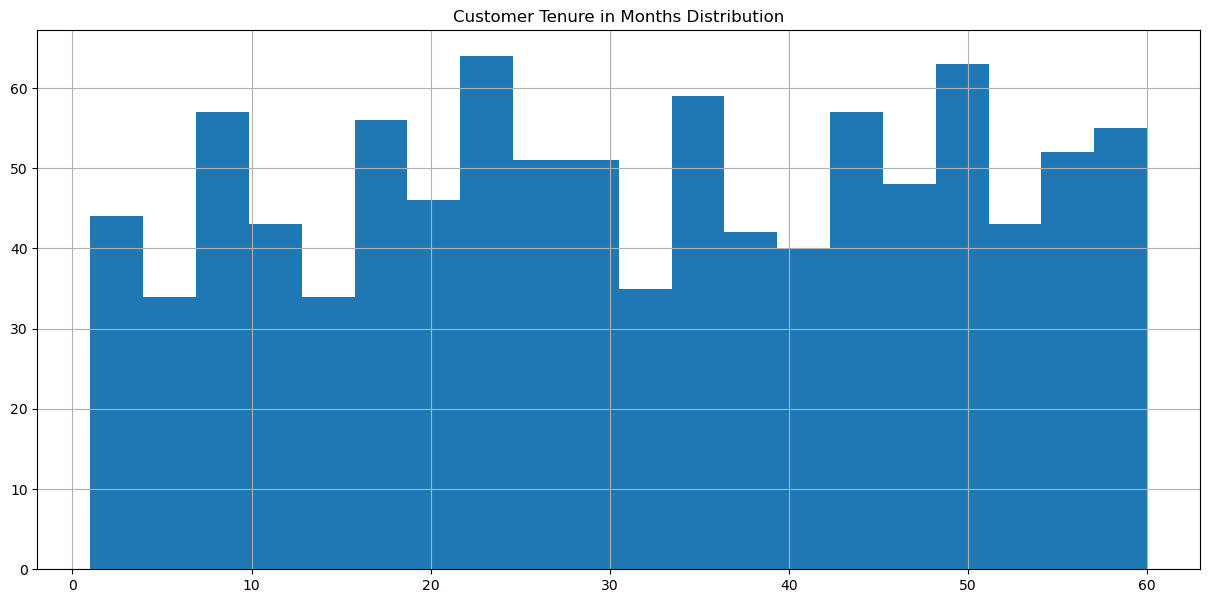

In [106]:
#histgram for customre tenure in months
plt.figure(figsize=(15,7))
mtn_data['Customer Tenure in months'].hist(bins=20)
plt.title('Customer Tenure in Months Distribution')
plt.show()

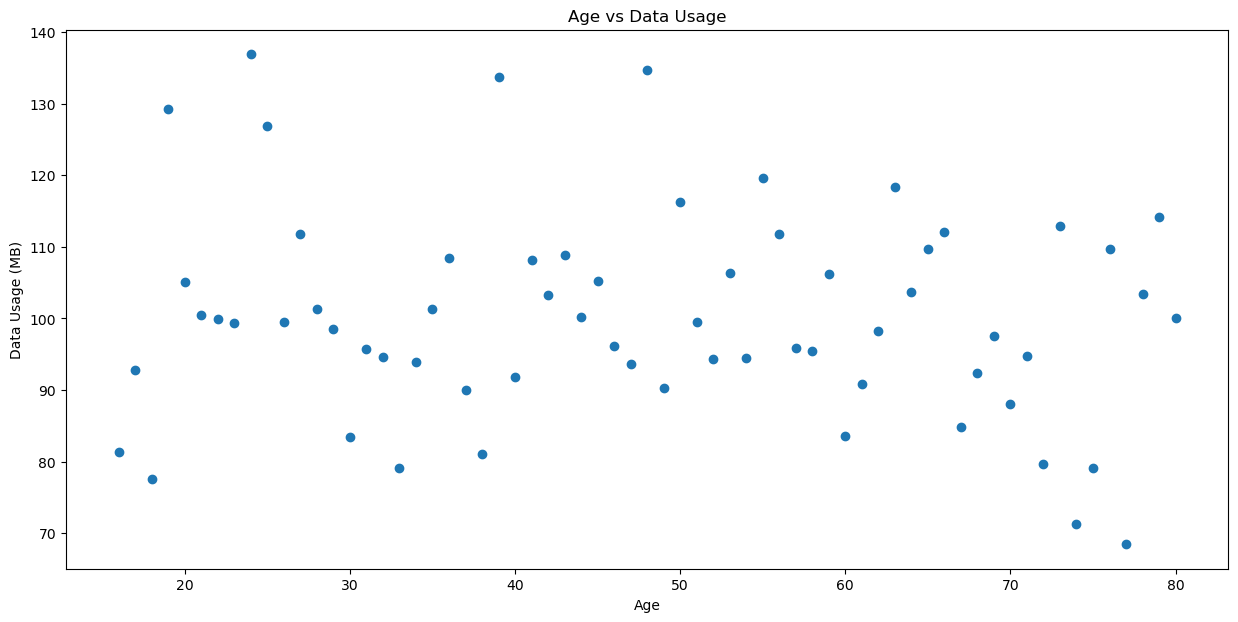

In [107]:
mtn_data = mtn_data.groupby('Age').agg({'Satisfaction Rate': 'mean', 'Data Usage': 'mean'}).reset_index()
#scatter plot for Age and Data Usage
plt.figure(figsize=(15,7))
plt.scatter(mtn_data['Age'], mtn_data['Data Usage'])
plt.title('Age vs Data Usage')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB)')
plt.show()

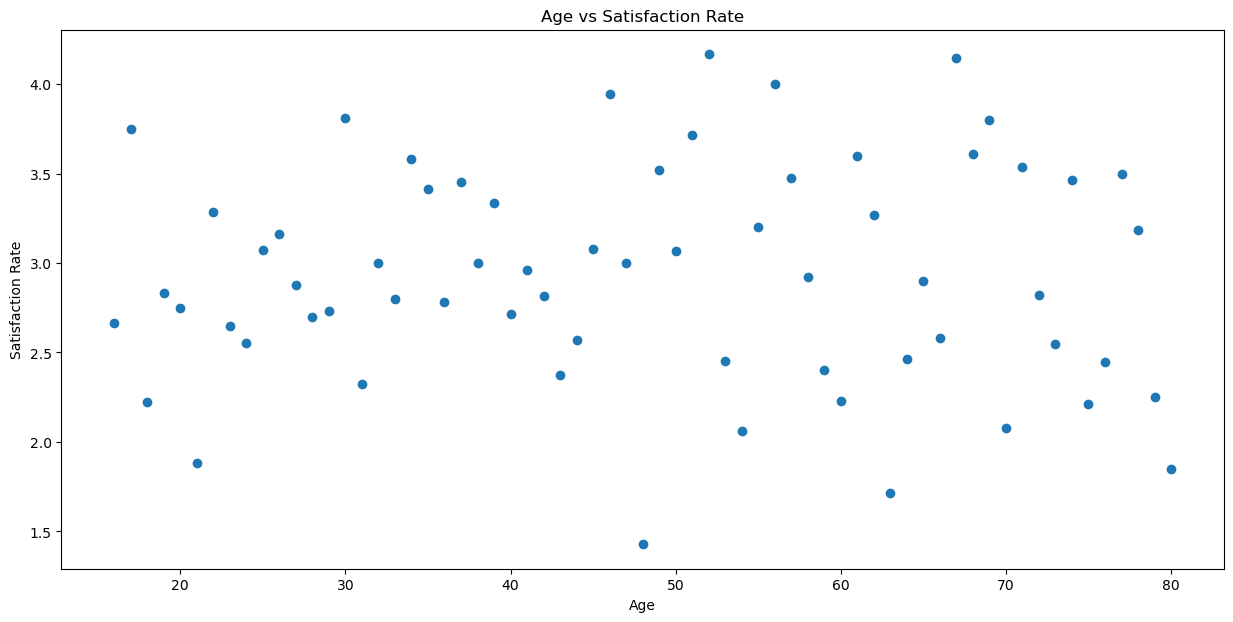

In [108]:
mtn_data = mtn_data.groupby('Age').agg({'Satisfaction Rate': 'mean', 'Data Usage': 'mean'}).reset_index()
#scatter plot for Age and Satisfaction Rate
plt.figure(figsize=(15,7))
plt.scatter(mtn_data['Age'], mtn_data['Satisfaction Rate'])
plt.title('Age vs Satisfaction Rate')
plt.xlabel('Age')
plt.ylabel('Satisfaction Rate')
plt.show()

In [109]:
#check the correlation between the variables
mtn_data.corr()

,Age,Satisfaction Rate,Data Usage
Age,1.000000,-0.008588,-0.136832
Satisfaction Rate,-0.008588,1.000000,-0.244977
Data Usage,-0.136832,-0.244977,1.000000


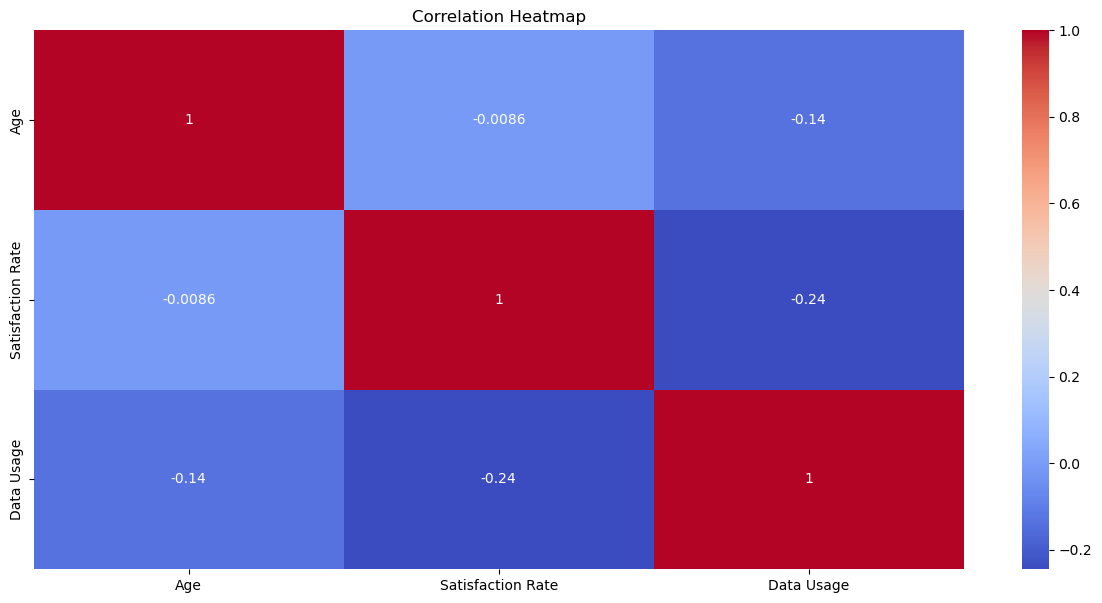

In [110]:
#heatmap for the correlation between the variables
plt.figure(figsize=(15,7))
sns.heatmap(mtn_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Data Transformation

In [127]:
#check the data types of the columns
categorical_columns = mtn_data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Customer ID', 'Full Name', 'Date of Purchase', 'State', 'MTN Device',
       'Gender', 'Customer Review', 'Subscription Plan',
       'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')


In [112]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode all categorical columns
for col in categorical_columns:
    mtn_data[col] = label_encoder.fit_transform(mtn_data[col])

# Verify the encoding
print(mtn_data.head())

   Age  Satisfaction Rate  Data Usage
0   16           2.666667   81.373333
1   17           3.750000   92.745000
2   18           2.222222   77.612222
3   19           2.833333  129.191667
4   20           2.750000  105.075000


In [113]:
# Apply One-Hot Encoding
mtn_data = pd.get_dummies(mtn_data, columns=categorical_columns, drop_first=True)

# Verify the encoding
print(mtn_data.head())

   Age  Satisfaction Rate  Data Usage
0   16           2.666667   81.373333
1   17           3.750000   92.745000
2   18           2.222222   77.612222
3   19           2.833333  129.191667
4   20           2.750000  105.075000


In [114]:
# Ensure all columns in categorical_columns exist in mtn_data
existing_columns = [col for col in categorical_columns if col in mtn_data.columns]

# Fill missing values only for existing columns
mtn_data[existing_columns] = mtn_data[existing_columns].fillna('Reasons for Churn')

In [115]:
print(mtn_data.columns)

Index(['Age', 'Satisfaction Rate', 'Data Usage'], dtype='object')


In [116]:
mtn_data = pd.read_csv(r'C:\\Users\\Rebecca\\Documents\\Data Analytics projects\\mtn_customer_churn.csv')

In [117]:
import os

# Ensure the directory exists
os.makedirs("DATA ANALYTICS PROJECTS", exist_ok=True)

# Save processed data
mtn_data.to_csv("DATA ANALYTICS PROJECTS/processed_data.csv", index=False)

print("Data processing complete!")

Data processing complete!


# HYPOTHESIS TESTING

We are going to use t-test and ANOVA for testing out hypothesis

- Null Hypothesis (H₀): Satisfaction Rate and  Reasons for churn do not significantly affect customer churn.

- Alternative Hypothesis (H₁): Satisfaction Rate and Reasons for churn significantly affect customer churn.


In [118]:
from scipy.stats import pearsonr

# Reload the dataset 
mtn_data = pd.read_csv(r'c:\\Users\\Rebecca\\Downloads\\mtn_customer_churn.csv')

In [119]:
corr, p_value = pearsonr(mtn_data['Satisfaction Rate'], mtn_data['Age'])
print(f"Correlation: {corr:.2f}, P-value: {p_value:.4f}")

Correlation: 0.01, P-value: 0.7692


In [120]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

In [126]:
# anova_data
anova_data = mtn_data[['Subscription Plan', 'Customer Churn Status']].dropna()

# Filter data based on satisfaction rate
t_test_data = anova_data.copy() 

In [ ]:
# Perform t-test
t_stat, p_value = ttest_ind(t_test_data['Subscription Plan Encoded'], t_test_data['Customer Churn Status'], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: 51.02, P-value: 0.0000


T-Test Interpretation
- T-statistic = 51.02 → This is a high value, indicating a large difference between two groups (likely churned vs loyal    customers).
- P-value = 0.0000 → Since this is well below 0.05, we reject the null hypothesis, meaning there is a significant difference in how Age affects churn

In [ ]:
# Perform ANOVA test
from scipy.stats import f_oneway

anova_data = mtn_data[['Subscription Plan Encoded', 'Customer Churn Status']].dropna()

anova_result = f_oneway(anova_data['Subscription Plan Encoded'], anova_data['Customer Churn Status'])
print(f"ANOVA F-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

ANOVA F-statistic: 2603.50, P-value: 0.0000


ANOVA F-Test Interpretation
- F-statistic = 2603.50 → A high F-value means variability between groups is much higher than within groups.
- P-value = 0.0000 → This confirms that Age and Satisfaction Rate have a statistically significant impact.

Business Insight & Next Steps
- Age is a strong predictor → we need to segment retention strategies by age group.

- Satisfaction Rate significantly affects churn → Focus on improving customer experience & service.

- Next Step: Perform a regression analysis to quantify the impact  of loyality for both Age and Satisfaction Rate.

